In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carregar a base de dados CIFAR-10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
# Definir os nomes das classes

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
# Pré-processamento dos dados

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# Carregar a arquitetura do modelo VGG16 (sem incluir a camada densa superior)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [12]:
# Congelar as camadas convolucionais do modelo VGG16
for layer in vgg_model.layers:
    layer.trainable = False


In [13]:
# Criar um modelo sequencial e adicionar as camadas do modelo VGG16 seguido de camadas densas
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Treinar o modelo
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 13s 16ms/step - loss: 2.7242 - accuracy: 0.4477 - val_loss: 1.2052 - val_accuracy: 0.5882
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.3053 - accuracy: 0.5492 - val_loss: 1.1129 - val_accuracy: 0.6167
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 1.1892 - accuracy: 0.5877 - val_loss: 1.0570 - val_accuracy: 0.6356
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 1.1193 - accuracy: 0.6128 - val_loss: 1.0384 - val_accuracy: 0.6452
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0805 - accuracy: 0.6248 - val_loss: 1.0109 - val_accuracy: 0.6593
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 1.0472 - accuracy: 0.6362 - val_loss: 1.0140 - val_accuracy: 0.6561
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0263 - accuracy: 0.6439 - val_loss: 1.0045 - val_accuracy:

In [16]:
# Avaliar o modelo
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

313/313 [==============================] - 2s 7ms/step


Text(0.5, 1.0, 'Matriz de Confusão - CIFAR-10')

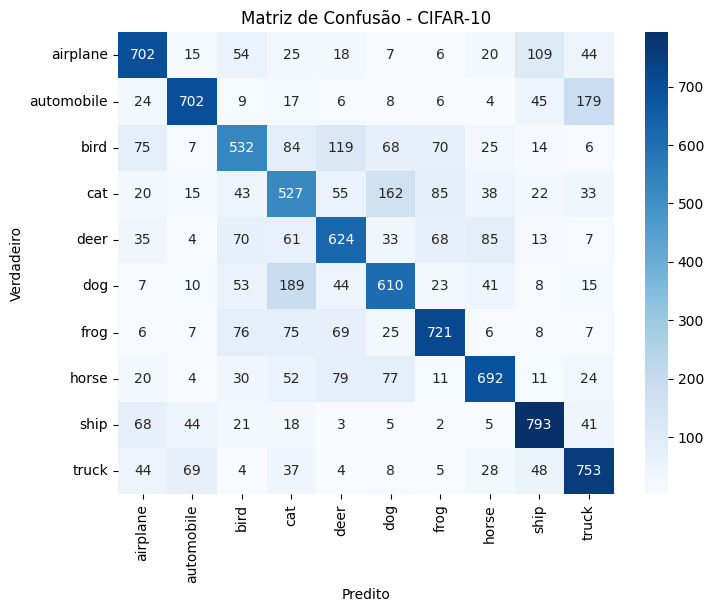

In [17]:
# Plotar a matriz de confusão com os nomes das classes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - CIFAR-10')

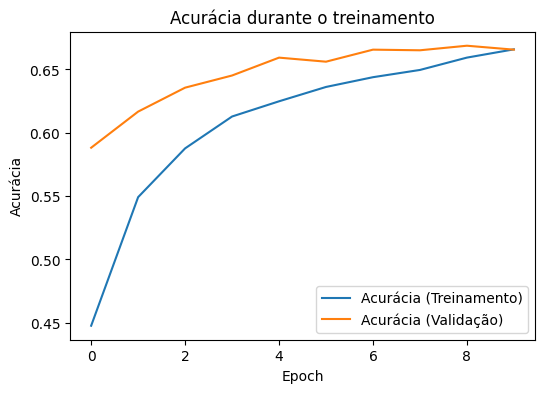

In [18]:
# Plotar gráfico de acurácia
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Acurácia (Treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (Validação)')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.legend()

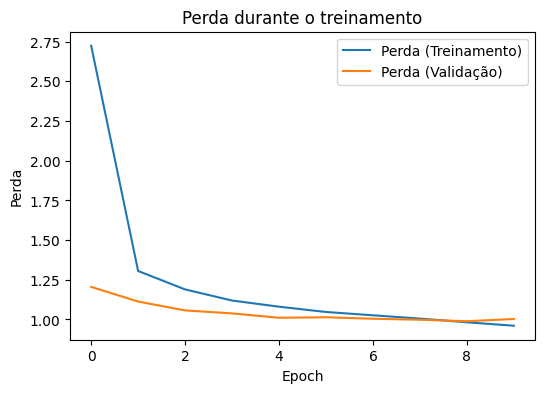

In [20]:
# Plotar gráfico de perda
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Perda (Treinamento)')
plt.plot(history.history['val_loss'], label='Perda (Validação)')
plt.title('Perda durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Perda')
plt.legend()

plt.show()